# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# SVM_RBF

In [6]:
time1_svm_r_0 = datetime.datetime.now()

svm_r_0 = SVC(kernel="rbf", random_state=None, gamma="auto", C=1,probability=True)
model_svm_r_0 = svm_r_0.fit(X_train, y_train)
y_svm_r_0 = model_svm_r_0.predict(X_test)
y_probs_svm_r_0 = model_svm_r_0.predict_proba(X_test)[:, 1]
time2_svm_r_0 = datetime.datetime.now()
print_score(y_test,y_svm_r_0,time1_svm_r_0 ,time2_svm_r_0)

comfusion matrix = 
[[2686  141]
 [ 221 4045]]

accuracy_score =  0.9489637670943183

completeness =  0.9481950304735115
contamination =  0.03368370759675107

precision score =  0.9663162924032489
recall score =  0.9481950304735115

F1 score =  0.9571699006152389

time span=  0:01:21.421973


In [7]:
time1_svm_r_1 = datetime.datetime.now()

svm_r_1 = SVC(kernel="rbf", random_state=None, gamma=1, C=1,probability=True)
model_svm_r_1 = svm_r_1.fit(X_train, y_train)
y_svm_r_1 = model_svm_r_1.predict(X_test)
y_probs_svm_r_1 = model_svm_r_1.predict_proba(X_test)[:, 1]
time2_svm_r_1 = datetime.datetime.now()
print_score(y_test,y_svm_r_1,time1_svm_r_1 ,time2_svm_r_1)

comfusion matrix = 
[[  36 2791]
 [   1 4265]]

accuracy_score =  0.6063724799097702

completeness =  0.9997655883731833
contamination =  0.3955498866213152

precision score =  0.6044501133786848
recall score =  0.9997655883731833

F1 score =  0.7534004592828122

time span=  0:12:56.105711


In [8]:
time1_svm_r_2 = datetime.datetime.now()

svm_r_2 = SVC(kernel="rbf", random_state=None, gamma=1, C=10,probability=True)
model_svm_r_2 = svm_r_2.fit(X_train, y_train)
y_svm_r_2 = model_svm_r_2.predict(X_test)
y_probs_svm_r_2 = model_svm_r_2.predict_proba(X_test)[:, 1]
time2_svm_r_2 = datetime.datetime.now()
print_score(y_test,y_svm_r_2,time1_svm_r_2 ,time2_svm_r_2)

comfusion matrix = 
[[  87 2740]
 [   2 4264]]

accuracy_score =  0.6134216833497814

completeness =  0.9995311767463666
contamination =  0.39120502569960025

precision score =  0.6087949743003997
recall score =  0.9995311767463666

F1 score =  0.7566992014196984

time span=  0:15:26.652250


In [9]:
time1_svm_r_3 = datetime.datetime.now()

svm_r_3 = SVC(kernel="rbf", random_state=None, gamma=0.1, C=1,probability=True)
model_svm_r_3 = svm_r_3.fit(X_train, y_train)
y_svm_r_3 = model_svm_r_3.predict(X_test)
y_probs_svm_r_3 = model_svm_r_3.predict_proba(X_test)[:, 1]
time2_svm_r_3 = datetime.datetime.now()
print_score(y_test,y_svm_r_3,time1_svm_r_3,time2_svm_r_3)

comfusion matrix = 
[[2683  144]
 [ 585 3681]]

accuracy_score =  0.8972226138446355

completeness =  0.8628691983122363
contamination =  0.03764705882352941

precision score =  0.9623529411764706
recall score =  0.8628691983122363

F1 score =  0.9098998887652948

time span=  0:05:35.771369


In [10]:
time1_svm_r_4 = datetime.datetime.now()

svm_r_4 = SVC(kernel="rbf", random_state=None, gamma=0.1, C=10,probability=True)
model_svm_r_4 = svm_r_4.fit(X_train, y_train)
y_svm_r_4 = model_svm_r_4.predict(X_test)
y_probs_svm_r_4 = model_svm_r_4.predict_proba(X_test)[:, 1]
time2_svm_r_4 = datetime.datetime.now()
print_score(y_test,y_svm_r_4,time1_svm_r_4,time2_svm_r_4)

comfusion matrix = 
[[2690  137]
 [ 564 3702]]

accuracy_score =  0.9011701677710419

completeness =  0.8677918424753868
contamination =  0.035686376660588694

precision score =  0.9643136233394113
recall score =  0.8677918424753868

F1 score =  0.9135101789019123

time span=  0:07:47.150574


In [11]:
time1_svm_r_5 = datetime.datetime.now()

svm_r_5 = SVC(kernel="rbf", random_state=None, gamma=0.1, C=0.1,probability=True)
model_svm_r_5 = svm_r_5.fit(X_train, y_train)
y_svm_r_5 = model_svm_r_5.predict(X_test)
y_probs_svm_r_5 = model_svm_r_5.predict_proba(X_test)[:, 1]
time2_svm_r_5 = datetime.datetime.now()
print_score(y_test,y_svm_r_5,time1_svm_r_5,time2_svm_r_5)

comfusion matrix = 
[[2680  147]
 [1026 3240]]

accuracy_score =  0.8346256872973354

completeness =  0.759493670886076
contamination =  0.043401240035429584

precision score =  0.9565987599645704
recall score =  0.759493670886076

F1 score =  0.8467267738141905

time span=  0:02:57.983644


In [12]:
time1_svm_r_6 = datetime.datetime.now()

svm_r_6 = SVC(kernel="rbf", random_state=None, gamma="auto", C=0.1,probability=True)
model_svm_r_6 = svm_r_6.fit(X_train, y_train)
y_svm_r_6 = model_svm_r_6.predict(X_test)
y_probs_svm_r_6 = model_svm_r_6.predict_proba(X_test)[:, 1]
time2_svm_r_6 = datetime.datetime.now()
print_score(y_test,y_svm_r_6,time1_svm_r_6,time2_svm_r_6)

comfusion matrix = 
[[2639  188]
 [ 459 3807]]

accuracy_score =  0.908783307486254

completeness =  0.8924050632911392
contamination =  0.047058823529411764

precision score =  0.9529411764705882
recall score =  0.8924050632911392

F1 score =  0.9216801839970947

time span=  0:01:50.690527


In [13]:
time1_svm_r_7 = datetime.datetime.now()

svm_r_7 = SVC(kernel="rbf", random_state=None, gamma="auto", C=10,probability=True)
model_svm_r_7 = svm_r_7.fit(X_train, y_train)
y_svm_r_7 = model_svm_r_7.predict(X_test)
y_probs_svm_r_7 = model_svm_r_7.predict_proba(X_test)[:, 1]
time2_svm_r_7 = datetime.datetime.now()
print_score(y_test,y_svm_r_7,time1_svm_r_7,time2_svm_r_7)

comfusion matrix = 
[[2628  199]
 [ 153 4113]]

accuracy_score =  0.9503736077823206

completeness =  0.9641350210970464
contamination =  0.046150278293135436

precision score =  0.9538497217068646
recall score =  0.9641350210970464

F1 score =  0.9589647936581954

time span=  0:01:24.832654


In [14]:
time1_svm_r_8 = datetime.datetime.now()

svm_r_8 = SVC(kernel="rbf", random_state=None, gamma="auto", C=100,probability=True)
model_svm_r_8 = svm_r_8.fit(X_train, y_train)
y_svm_r_8 = model_svm_r_8.predict(X_test)
y_probs_svm_r_8 = model_svm_r_8.predict_proba(X_test)[:, 1]
time2_svm_r_8 = datetime.datetime.now()
print_score(y_test,y_svm_r_8,time1_svm_r_8,time2_svm_r_8)

comfusion matrix = 
[[2613  214]
 [ 163 4103]]

accuracy_score =  0.9468490060623149

completeness =  0.9617909048288795
contamination =  0.04957146166319203

precision score =  0.950428538336808
recall score =  0.9617909048288795

F1 score =  0.9560759641151112

time span=  0:01:36.605866


In [15]:
time1_svm_r_9 = datetime.datetime.now()

svm_r_9 = SVC(kernel="rbf", random_state=None, gamma="auto", C=10,probability=True)
model_svm_r_9 = svm_r_9.fit(X_std_train, y_train)
y_svm_r_9 = model_svm_r_9.predict(X_std_test)
y_probs_svm_r_9 = model_svm_r_9.predict_proba(X_std_test)[:, 1]
time2_svm_r_9 = datetime.datetime.now()
print_score(y_test,y_svm_r_9,time1_svm_r_9,time2_svm_r_9)

comfusion matrix = 
[[2728   99]
 [  89 4177]]

accuracy_score =  0.9734949950655576

completeness =  0.9791373652133146
contamination =  0.02315247895229186

precision score =  0.9768475210477081
recall score =  0.9791373652133146

F1 score =  0.9779911027862328

time span=  0:00:23.356917


In [16]:
time1_svm_r_10 = datetime.datetime.now()

svm_r_10 = SVC(kernel="rbf", random_state=None, gamma=0.001, C=10,probability=True)
model_svm_r_10 = svm_r_10.fit(X_std_train, y_train)
y_svm_r_10 = model_svm_r_10.predict(X_std_test)
y_probs_svm_r_10 = model_svm_r_10.predict_proba(X_std_test)[:, 1]
time2_svm_r_10 = datetime.datetime.now()
print_score(y_test,y_svm_r_10,time1_svm_r_10,time2_svm_r_10)

comfusion matrix = 
[[2717  110]
 [  82 4184]]

accuracy_score =  0.9729310587903567

completeness =  0.9807782466010314
contamination =  0.025617140195621797

precision score =  0.9743828598043782
recall score =  0.9807782466010314

F1 score =  0.9775700934579439

time span=  0:00:31.302392


## Feature Importance

<IPython.core.display.Javascript object>


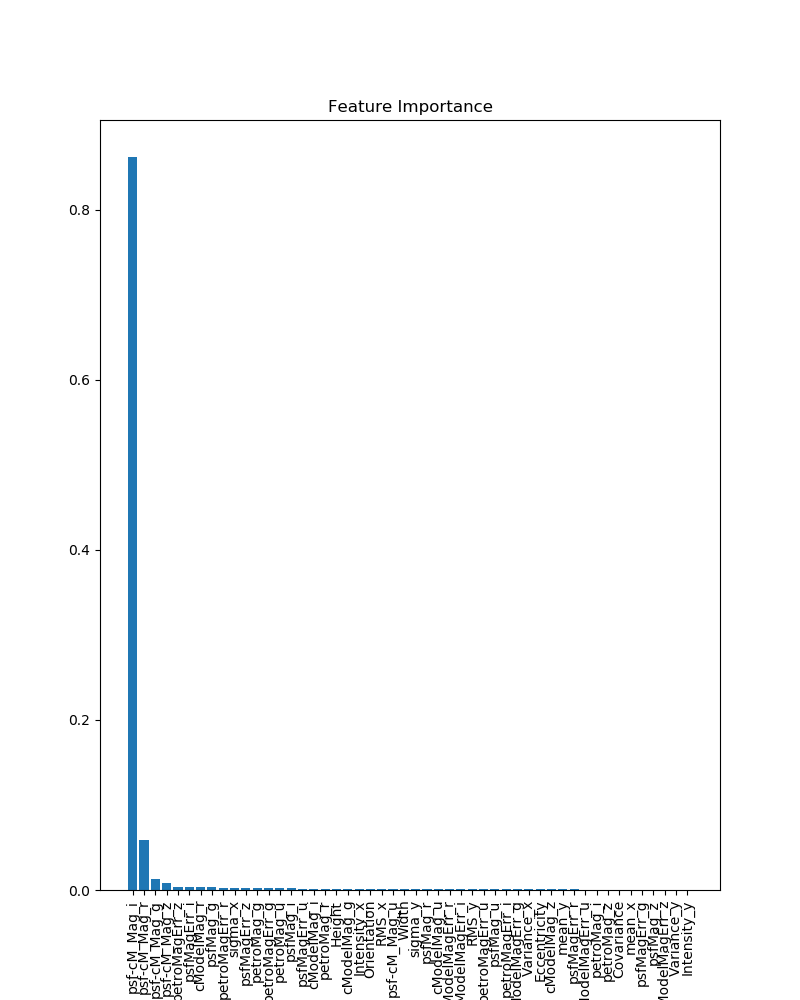

In [102]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


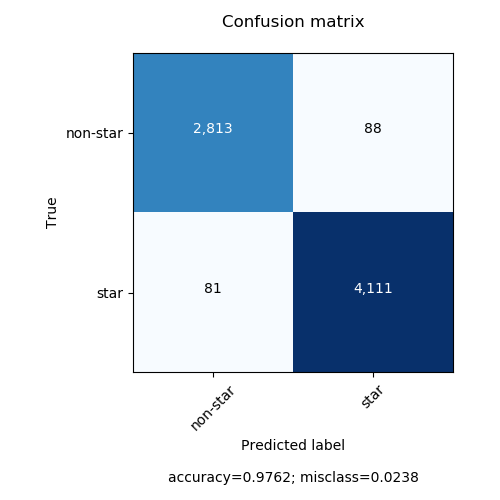

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [17]:
score_svm_r_0 = score(y_test,y_svm_r_0,time1_svm_r_0,time2_svm_r_0)
score_svm_r_1 = score(y_test,y_svm_r_1,time1_svm_r_1 ,time2_svm_r_1)
score_svm_r_2 = score(y_test,y_svm_r_2,time1_svm_r_2 ,time2_svm_r_2)
score_svm_r_3 = score(y_test,y_svm_r_3,time1_svm_r_3 ,time2_svm_r_3)
score_svm_r_4 = score(y_test,y_svm_r_4,time1_svm_r_4 ,time2_svm_r_4)
score_svm_r_5 = score(y_test,y_svm_r_5,time1_svm_r_5 ,time2_svm_r_5)
score_svm_r_6 = score(y_test,y_svm_r_6,time1_svm_r_6 ,time2_svm_r_6)
score_svm_r_7 = score(y_test,y_svm_r_7,time1_svm_r_7 ,time2_svm_r_7)
score_svm_r_8 = score(y_test,y_svm_r_8,time1_svm_r_8 ,time2_svm_r_8)
score_svm_r_9 = score(y_test,y_svm_r_9,time1_svm_r_9 ,time2_svm_r_9)
score_svm_r_10 = score(y_test,y_svm_r_10,time1_svm_r_10 ,time2_svm_r_10)

In [18]:
m1_t = pd.DataFrame({
 'accuracy' : [score_svm_r_0[1],score_svm_r_1[1],score_svm_r_2 [1],score_svm_r_3[1],score_svm_r_4[1],score_svm_r_5[1],score_svm_r_6[1],score_svm_r_7[1],score_svm_r_8[1],score_svm_r_9[1],score_svm_r_10[1]],
 'completeness' : [score_svm_r_0[2],score_svm_r_1[2],score_svm_r_2 [2],score_svm_r_3[2],score_svm_r_4[2],score_svm_r_5[2],score_svm_r_6[2],score_svm_r_7[2],score_svm_r_8[2],score_svm_r_9[2],score_svm_r_10[2]],
 'contamination' : [score_svm_r_0[3],score_svm_r_1[3],score_svm_r_2 [3],score_svm_r_3[3],score_svm_r_4[3],score_svm_r_5[3],score_svm_r_6[3],score_svm_r_7[3],score_svm_r_8[3],score_svm_r_9[3],score_svm_r_10[3]],
 'precision' : [score_svm_r_0[4],score_svm_r_1[4],score_svm_r_2 [4],score_svm_r_3[4],score_svm_r_4[4],score_svm_r_5[4],score_svm_r_6[4],score_svm_r_7[4],score_svm_r_8[4],score_svm_r_9[4],score_svm_r_10[4]],
 'recall' : [score_svm_r_0[5],score_svm_r_1[5],score_svm_r_2 [5],score_svm_r_3[5],score_svm_r_4[5],score_svm_r_5[5],score_svm_r_6[5],score_svm_r_7[5],score_svm_r_8[5],score_svm_r_9[5],score_svm_r_10[5]],
 'F1 score' : [score_svm_r_0[6],score_svm_r_1[6],score_svm_r_2 [6],score_svm_r_3[6],score_svm_r_4[6],score_svm_r_5[6],score_svm_r_6[6],score_svm_r_7[6],score_svm_r_8[6],score_svm_r_9[6],score_svm_r_10[6]],
 'time span' : [score_svm_r_0[7],score_svm_r_1[7],score_svm_r_2 [7],score_svm_r_3[7],score_svm_r_4[7],score_svm_r_5[7],score_svm_r_6[7],score_svm_r_7[7],score_svm_r_8[7],score_svm_r_9[7],score_svm_r_10[7]]
                })

m1_t.rename(index = {0: "score_svm_r_0", 
                     1: "score_svm_r_1",
                     2: "score_svm_r_2",
                     3: "score_svm_r_3",
                     4: "score_svm_r_4",
                     5: "score_svm_r_5",
                     6: "score_svm_r_6",
                     7: "score_svm_r_7",
                     8: "score_svm_r_8",
                     9: "score_svm_r_9",
                     10: "score_svm_r_10"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_svm_r_0,0.948964,0.948195,0.033684,0.966316,0.948195,0.957170,00:01:21.421973
score_svm_r_1,0.606372,0.999766,0.395550,0.604450,0.999766,0.753400,00:12:56.105711
score_svm_r_2,0.613422,0.999531,0.391205,0.608795,0.999531,0.756699,00:15:26.652250
score_svm_r_3,0.897223,0.862869,0.037647,0.962353,0.862869,0.909900,00:05:35.771369
score_svm_r_4,0.901170,0.867792,0.035686,0.964314,0.867792,0.913510,00:07:47.150574
score_svm_r_5,0.834626,0.759494,0.043401,0.956599,0.759494,0.846727,00:02:57.983644
score_svm_r_6,0.908783,0.892405,0.047059,0.952941,0.892405,0.921680,00:01:50.690527
score_svm_r_7,0.950374,0.964135,0.046150,0.953850,0.964135,0.958965,00:01:24.832654
score_svm_r_8,0.946849,0.961791,0.049571,0.950429,0.961791,0.956076,00:01:36.605866
score_svm_r_9,0.973495,0.979137,0.023152,0.976848,0.979137,0.977991,00:00:23.356917


<IPython.core.display.Javascript object>


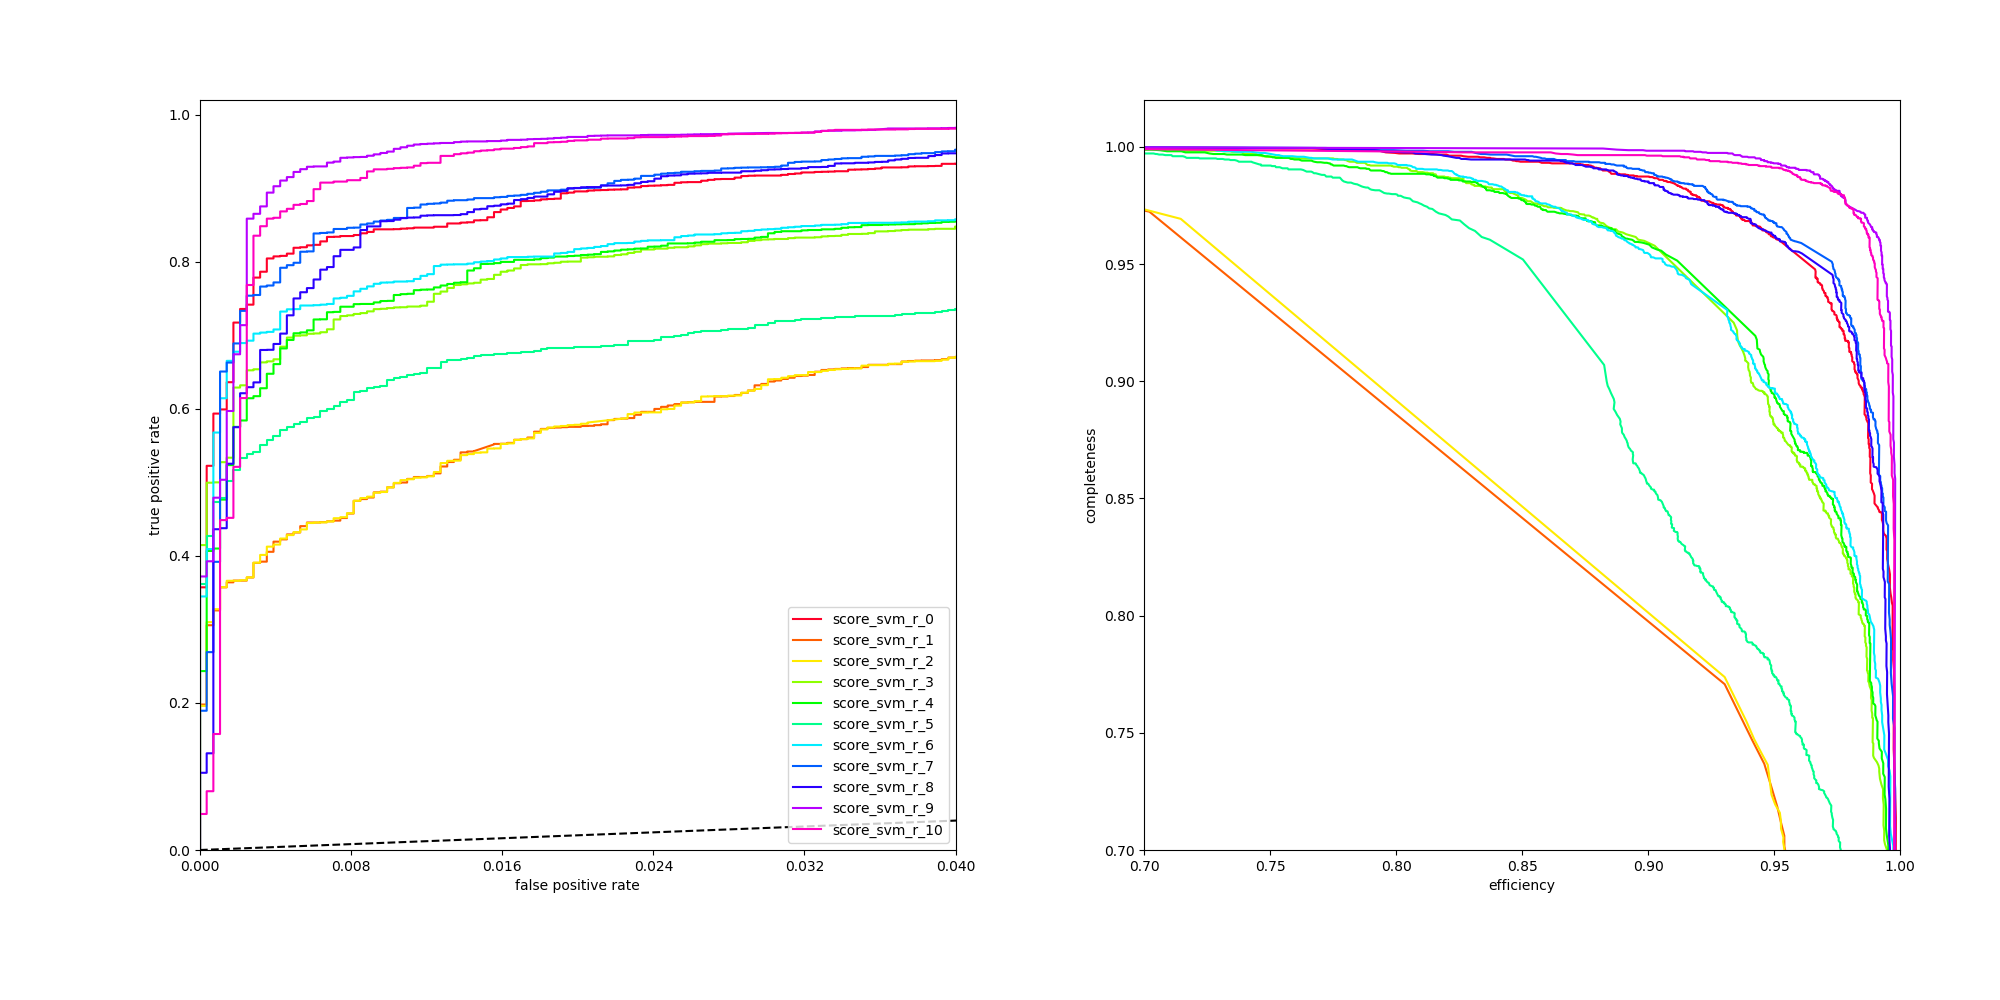

In [20]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_svm_r_0,y_probs_svm_r_1,y_probs_svm_r_2,y_probs_svm_r_3,y_probs_svm_r_4,y_probs_svm_r_5,y_probs_svm_r_6,y_probs_svm_r_7,y_probs_svm_r_8,y_probs_svm_r_9,y_probs_svm_r_10]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()